In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('reviews_clean.csv', sep=';', encoding='utf-8', index_col='Unnamed: 0')
length = [len(x.split()) for x in list(df.review)]   # adding column with review lengths
df['review_length'] = length
df

,review,title,tag,rating,review_length
0,"Cringe ""comedy"" in a nutshell except there's n...",Amagi Brilliant Park,Not Recommended,2,104
1,So this is the thing about this anime. **some ...,Higeki no Genkyou to Naru Saikyou Gedou Last B...,Mixed Feelings,5,279
2,The show is depressing as fuck. But good. As f...,Sousou no Frieren,Recommended,9,359
3,"Ugly CGI, bland villains, bland one-dimensiona...",Kimetsu no Yaiba,Not Recommended,3,188
4,Boring. Cliche. Lame. Ousama Ranking is extrem...,Ousama Ranking,Not Recommended,2,129
...,...,...,...,...,...
242138,A comedy/romance based on the manga by Rumiko ...,Ranma ½,Recommended,7,521
242139,Saiyuki is one of those animes that just grabs...,Gensoumaden Saiyuuki,Recommended,9,290
242140,"First, let me say that I\'m not a fan of boxin...",Hajime no Ippo,Recommended,10,169
242141,Utawarerumono manages to be one of those harem...,Utawarerumono,Recommended,8,765


In [3]:
print('Number of unique anime titles:', df.title.nunique())
print('Min number of reviews of a title:', df.title.value_counts().min())
print('Max number of reviews of a title:', df.title.value_counts().max())
print('Mean number of reviews per title:', df.title.value_counts().mean())
print('Median number of reviews per title:', df.title.value_counts().median())
print('\nMin review length:', df.length.min())
print('Max review length:', df.length.max())
print('Mean review length:', df.length.mean())
print('Median review length:', df.length.median())

Number of unique anime titles: 11070
Min number of reviews of a title: 1
Max number of reviews of a title: 1548
Mean number of reviews per title: 21.800180668473352
Median number of reviews per title: 4.0

Min review length: 12
Max review length: 11548
Mean review length: 443.8145602346741
Median review length: 301.0


### Reviews per title distribution

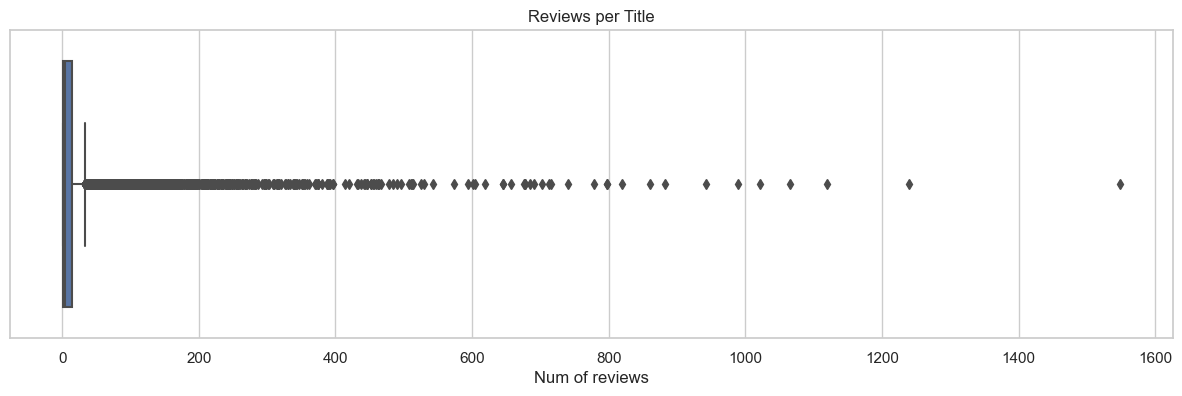

In [24]:
plt.figure(figsize=(15, 4))

# Count occurrences of each unique value in the 'titles' column
title_counts = df['title'].value_counts()

# Create a box plot of the counts
sns.set_theme(style="whitegrid")
sns.boxplot(x=title_counts)
plt.title('Reviews per Title')
plt.xlabel('Num of reviews')
plt.show()

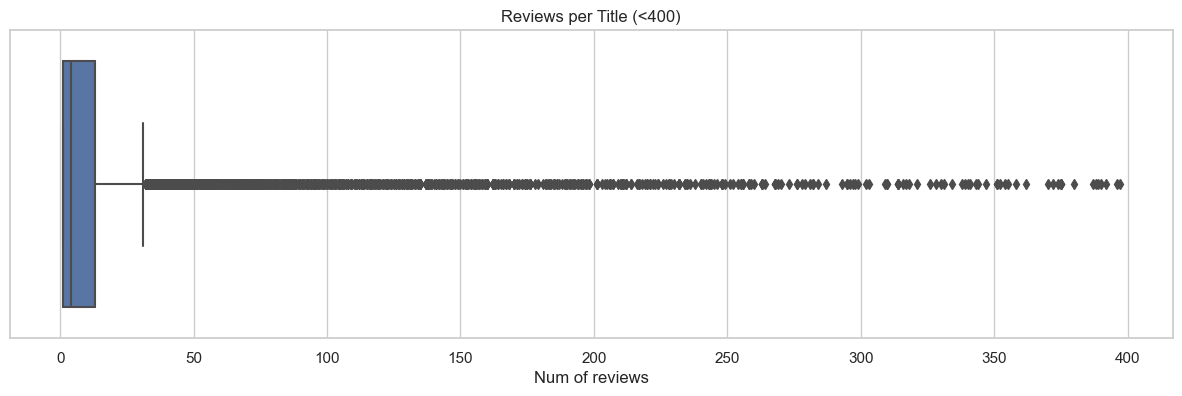

In [23]:
plt.figure(figsize=(15, 4))

title_counts = df['title'].value_counts()
titles_to_drop = title_counts[title_counts > 400].index
df_title_filtered = df[~df['title'].isin(titles_to_drop)]

title_counts = df_title_filtered['title'].value_counts()
sns.set_theme(style="whitegrid")
sns.boxplot(x=title_counts)
plt.title('Reviews per Title (<400)')
plt.xlabel('Num of reviews')
plt.show()

### Review length distribution

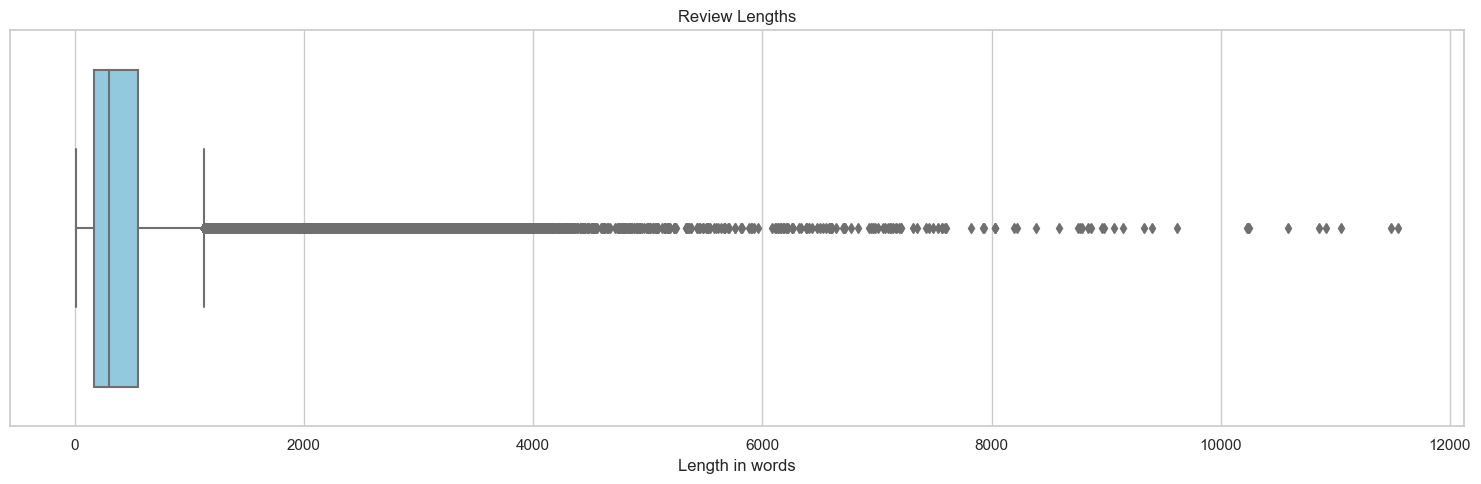

In [22]:
plt.figure(figsize=(15, 5))

# Box plot
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x='length', color='skyblue')
plt.title('Review Lengths')
plt.xlabel('Length in words')

plt.tight_layout()
plt.show()

The box plot above shows that any reviews whose length is more than ~1000 words can be considered outliers.

### Correlation between review length and rating

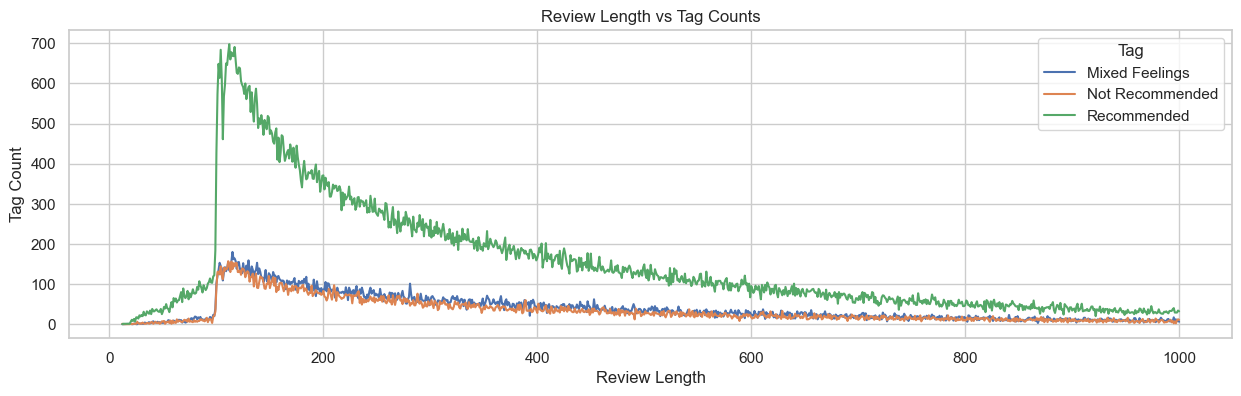

In [19]:
df_reviews_filtered = df[df['length'] <= 1000]   # dropping the outliers for a clearer visualization

# Group by 'rating' and count occurrences of each 'length' value
tag_length_counts = df_reviews_filtered.groupby('tag')['length'].value_counts().unstack(fill_value=0)

# Plotting the data using Seaborn's lineplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 4))
for tag in tag_length_counts.index:
    sns.lineplot(x=tag_length_counts.columns, y=tag_length_counts.loc[tag], label=f'{tag}')

plt.title('Review Length vs Tag Counts')
plt.xlabel('Review Length')
plt.ylabel('Tag Count')
plt.legend(title='Tag')
plt.show()

The plot above suggests that there is no significant correlation between the review length and its tag/rating. Counts of reviews with each tag peak at approx. 100-words length, dropping evenly towards both min. and max. lengths.

The plot above shows a jump at approx. 100-word length threshold, which is probably the result of the website's guidelines recommending that the reviews should be at least 5000 characters. However, the shorter reviews proved to be informative too.

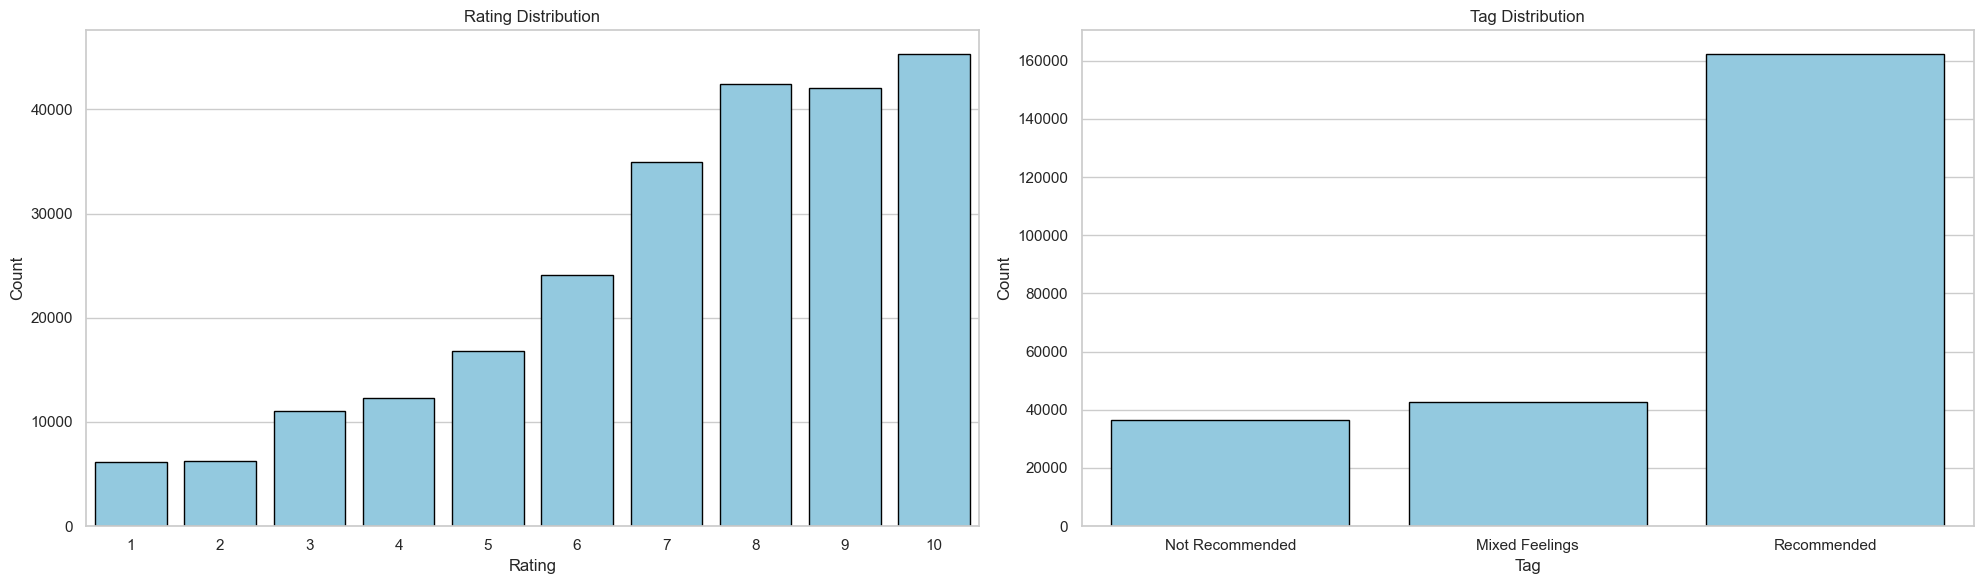

In [20]:
plt.figure(figsize=(20, 6))

# Create a count plot of rating values
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='rating', color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Create a count plot of tag values
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='tag', color='skyblue', edgecolor='black')
plt.title('Tag Distribution')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### How review lengths vary with rating

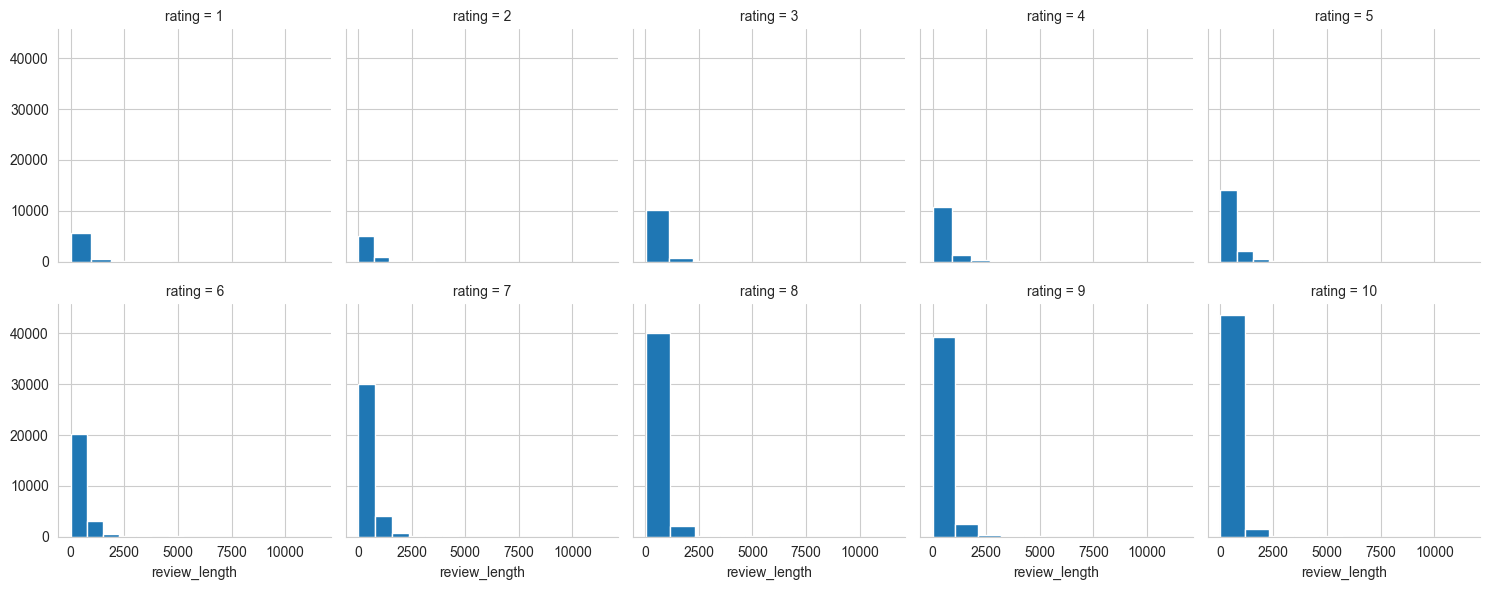

In [10]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df,col='rating', col_wrap=5)
g.map(plt.hist,'review_length')